<a href="https://colab.research.google.com/github/Vakhranev/MGIMO/blob/main/14%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описательный анализ данных

**Группирование данных и нормальное распределение**

Это занятие **для начинающих** посвящено описательным статистикам, группированию данных и нормальному распределению. Ряд постов по теме на Хабре см. [здесь](https://habr.com/ru/articles/556000/).

Столбец с данными об электорате Electorate показывает суммарное число зарегистрированных избирателей в каждом избирательном округе:

In [23]:
import scipy as sp
from scipy import stats  # модуль статистических функций
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.read_excel('UK2010.xls')

,Press Association Reference,Constituency Name,Region,Election Year,Electorate,Votes,AC,AD,AGS,APNI,...,UKIP,UPS,UV,VCCA,Vote,Wessex Reg,WRP,You,Youth,YRDPL
0,1.0,Aberavon,Wales,2010.0,50838.0,30958,NaN,NaN,NaN,NaN,...,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Aberconwy,Wales,2010.0,44593.0,29966,NaN,NaN,NaN,NaN,...,632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Aberdeen North,Scotland,2010.0,64808.0,37701,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Aberdeen South,Scotland,2010.0,64031.0,43034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Aberdeenshire West & Kincardine,Scotland,2010.0,66110.0,45195,NaN,NaN,NaN,NaN,...,397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647.0,Ynys Mon,Wales,2010.0,50075.0,34444,NaN,NaN,NaN,NaN,...,1201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,648.0,York Central,Yorkshire and the Humber,2010.0,76439.0,46483,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,649.0,York Outer,Yorkshire and the Humber,2010.0,75939.0,53300,NaN,NaN,NaN,NaN,...,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,650.0,Yorkshire East,Yorkshire and the Humber,2010.0,80105.0,51254,NaN,NaN,NaN,NaN,...,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def load_uk():
    '''Загрузить данные по Великобритании'''
    return pd.read_excel('UK2010.xls')

In [8]:
def load_uk_scrubbed():
    '''Загрузить и отфильтровать данные по Великобритании'''
    df = load_uk()
    return df[ df[ 'Election Year' ].notnull() ]

In [9]:
def ex_1_6():
    '''Число значений в поле "Электорат"'''
    return load_uk_scrubbed()['Electorate'].count()

In [10]:
ex_1_6()

650

Мы уже очистили столбец, отфильтровав пустые значения (`nan`) из набора данных, и поэтому предыдущий пример должен вернуть суммарное число избирательных округов.

Описательные статистики, так называемые *сводные статистики*, представляют собой разные подходы к измерению свойств последовательностей чисел.

Среднее значение на самом деле представляет собой один из нескольких способов измерения *центра распределения* данных.

4495dd06da9617989fbe5319a1972386.svg

Среднее значение числового ряда вычисляется на Python следующим образом:

In [11]:
def mean(xs):
    '''Среднее значение числового ряда'''
    return sum(xs) / len(xs)

Мы можем воспользоваться нашей новой функцией `mean` для вычисления среднего числа избирателей в Великобритании:

In [12]:
def ex_1_7():
    '''Вернуть среднее значение поля "Электорат"'''
    return mean( load_uk_scrubbed()['Electorate'] )

In [13]:
ex_1_7()

70149.94

В нашем случае функцию mean, которая уже содержится в библиоттеке pandas, можно применить следующим образом:

In [14]:
load_uk_scrubbed()['Electorate'].mean()

70149.94

Если в последовательности число точек данных четное, то медиана определяется, как полусумма двух срединных значений.

In [15]:
def median(xs):
    '''Медиана числового ряда'''
    n = len(xs)
    mid = n // 2
    if n % 2 == 1:
        return sorted(xs)[mid]
    else:
        return mean( sorted(xs)[mid-1:][:2] )

Медианное значение электората Великобритании составляет:

In [16]:
def ex_1_8():
    '''Вернуть медиану поля "Электорат"'''
    return median( load_uk_scrubbed()['Electorate'] )

In [17]:
ex_1_8()

70813.5

Библиотека pandas тоже располагает встроенной функцией для вычисления медианного значения, которая так и называется `median`.

На языке математики дисперсия обозначается следующим образом:

0b9c93359e92b78696a3425945a63725.svg

где s2  — это математический символ, который часто используют для обозначения дисперсии.

Выражение

ae670e8b960092ff4386b2ce3f8b9602.svg

In [18]:
def variance(xs):
    '''Дисперсия (варианс) числового ряда,
       несмещенная дисперсия при n <= 30'''
    mu = mean(xs)
    n = len(xs)
    n = n-1 if n in range(1, 30) else n
    square_deviation = lambda x : (x - mu) ** 2
    return sum( map(square_deviation, xs) ) / n

Для вычисления квадрата выражения используется оператор языка Python возведения в степень `**`.

В результате приведения единицы измерения к более естественному виду, снова обозначающему «людей», получим так называемое *стандартное отклонение*, или среднеквадратичное отклонение:

In [24]:
def standard_deviation(xs):
    '''Стандартное отклонение числового ряда'''
    return np.sqrt( variance(xs) )

def ex_1_9():
    '''Стандартное отклонение поля "Электорат"'''
    return standard_deviation( load_uk_scrubbed()['Electorate'] )

In [25]:
ex_1_9()

7672.772645446216

В библиотеке pandas функции для вычисления дисперсии (варианса) и стандартного отклонения имплементированы соответственно, как `var` и `std`. При этом последняя по умолчанию вычисляет несмещенное значение, поэтому, чтобы получить тот же самый результат, нужно применить именованный аргумент `ddof=0`, который сообщает, что требуется вычислить смещенное значение стандартного отклонения:

In [26]:
load_uk_scrubbed()['Electorate'].std( ddof=0 )

7672.772645446216

Медиана представляет собой один из способов вычислить *срединное* значение из списка, т.е. находящееся ровно по *середине*, дисперсия же предоставляет способ измерить разброс данных вокруг среднего значения.

Для примера рассмотрим следующую ниже последовательность чисел:

`[10 11 15 21 22.5 28 30]`

0.0 (нулевой), 0.25, 0.5, 0.75 и 1.0 квантили иногда упоминаются в связи с *пятичисловой сводкой*.

Квантили можно вычислить непосредственно в pandas при помощи функции `quantile`. Последовательность требующихся квантилей передается в виде списка.

In [27]:
def ex_1_10():
    '''Вычислить квантили:
       возвращает значение в последовательности xs,
       соответствующее p-ому проценту'''
    q = [0, 1/4, 1/2, 3/4, 1]
    return load_uk_scrubbed()['Electorate'].quantile(q=q)

In [28]:
ex_1_10()

,Electorate
0.00,21780.00
0.25,65929.25
0.50,70813.50
0.75,74948.50
1.00,109922.00


Когда квантили делят диапазон на четыре равных диапазона, как показано выше, то они называются *квартилями*. Разница между нижним (0.25) и верхним (0.75) квартилями называется *межквартильным размахом*, или иногда сокращенно МКР.

В целях развития интуитивного понимания в отношении того, что именно все эти расчеты разброса значений измеряют, мы можем применить метод под названием *группировка в частотные корзины* (binning). Когда данные имеют непрерывный характер, использование специального словаря для подсчета частот `Counter` (подобно тому, как он использовался при подсчете количества пустых значений в наборе данных об электорате) становится нецелесообразным, поскольку никакие два значения не могут быть одинаковыми. Между тем, общее представление о структуре данных можно все-равно получить, сгруппировав для этого данные в частотные *корзины* (bins).

Подсчитав количества точек, попадающих в каждую корзину, мы можем получить представление о разбросе данных:

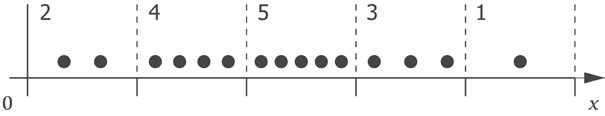

На приведенном выше рисунке показано 15 значений *x*, разбитых на 5 равноразмерных корзин.

Следующая ниже функция Python `nbin` позволяет добиться того же самого результата:

In [29]:
def nbin(n, xs):
    '''Разбивка данных на частотные корзины'''
    min_x, max_x = min(xs), max(xs)
    range_x = max_x - min_x
    fn = lambda x: min( int((abs(x) - min_x) / range_x * n), n-1 )
    return map(fn, xs)

Например, мы можем разбить диапазон 0-14 на 5 корзин следующим образом:

In [30]:
list( nbin(5, range(15)) )

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

После того, как мы разбили значения на корзины, мы можем в очередной раз воспользоваться словарем `Counter`, чтобы подсчитать количество точек в каждой корзине. В следующем ниже примере мы воспользуемся этим словарем для разбиения данных об электорате Великобритании на пять корзин:

In [33]:
from collections import Counter

def ex_1_11():
    '''Разбиmь электорат Великобритании на 5 корзин'''
    series = load_uk_scrubbed()['Electorate']
    return Counter( nbin(5, series) )

In [34]:
ex_1_11()

Counter({1: 26, 2: 450, 3: 171, 4: 1, 0: 2})

Мы уже увидели, каким образом можно выполнить разбиение данных на корзины самостоятельно, однако в библиотеке pandas уже содержится функция `hist`, которая разбивает данные и визуализирует их в виде гистограммы.

In [35]:
def ex_1_12():
    '''Построить гистограмму частотных корзин
       электората Великобритании'''
    load_uk_scrubbed()['Electorate'].hist()
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Приведенный выше пример сгенерирует следующий ниже график:

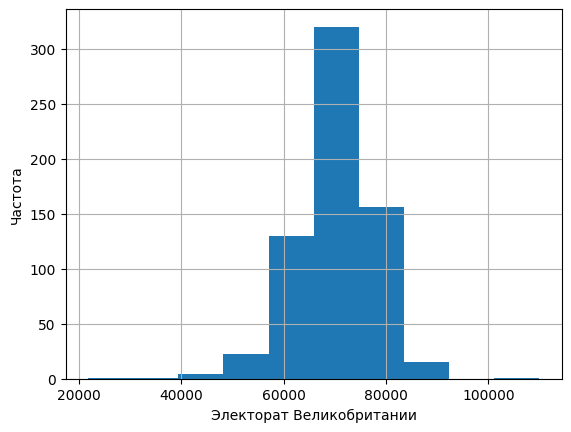

In [36]:
ex_1_12()

Число корзин, на которые данные разбиваются, можно сконфигурировать, передав в функцию при построении гистограммы именованный аргумент `bins`:

In [37]:
def ex_1_13():
    '''Построить гистограмму частотных корзин
       электората Великобритании с 200 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=200)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Следующий ниже график показывает мелкие детали, но величина столбцов делает неясной форму распределения, в особенности в хвостах:

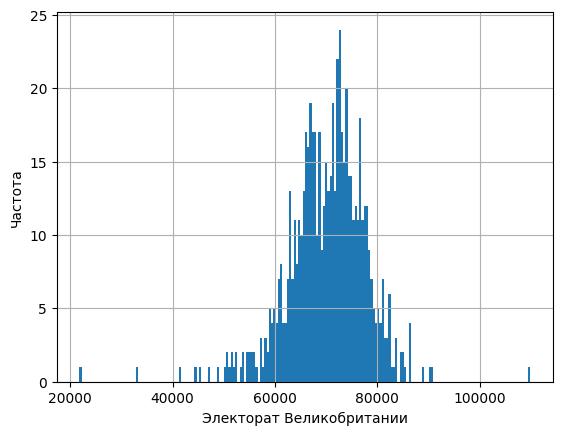

In [38]:
ex_1_13()

При выборе количества корзин для представления данных следует найти точку равновесия — с малым количеством корзин форма данных будет представлена лишь приблизительно, а слишком большое их число приведет к тому, что шумовые признаки могут заслонить лежащую в основании структуру.

In [39]:
def ex_1_14():
    '''Построить гистограмму частотных корзин
       электората Великобритании с 20 корзинами'''
    load_uk_scrubbed()['Electorate'].hist(bins=20)
    plt.xlabel('Электорат Великобритании')
    plt.ylabel('Частота')
    plt.show()

Ниже показана гистограмма теперь уже из 20 корзин:

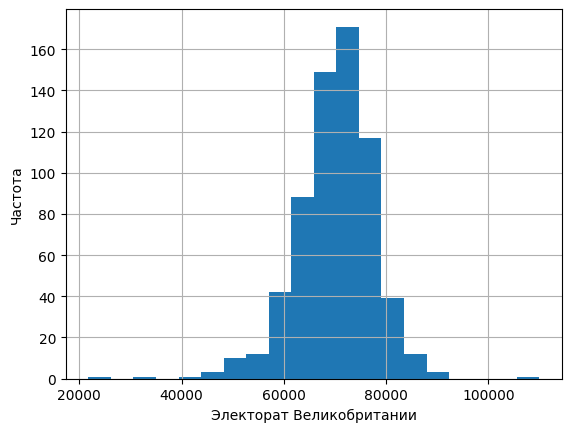

In [40]:
ex_1_14()

*Мода* — это значение, встречающееся в последовательности наиболее часто.

В анализе данных многие распределения встречаются часто, но ни одно не встречается также часто, как нормальное распределение, именуемое также *гауссовым распределением*.

В программировании типичным распределением является *равномерное* распределение. Оно представлено распределением чисел, генерируемых функцией библиотеки scipy `stats.uniform.rvs`: в справедливом генераторе случайных чисел все числа имеют равные шансы быть сгенерированными. Мы можем увидеть это на гистограмме, многократно генерируя серию случайных чисел между 0 и 1 и затем построив график с результатами.

In [41]:
def ex_1_15():
    '''Показать гистограмму равномерного распределения
       синтетического набора данных'''
    xs = stats.uniform.rvs(0, 1, 10000)
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Равномерное распределение')
    plt.ylabel('Частота')
    plt.show()

Обратите внимание, что в этом примере мы впервые использовали тип `Series` библиотеки pandas для числового ряда данных.

Приведенный выше пример создаст следующую гистограмму:

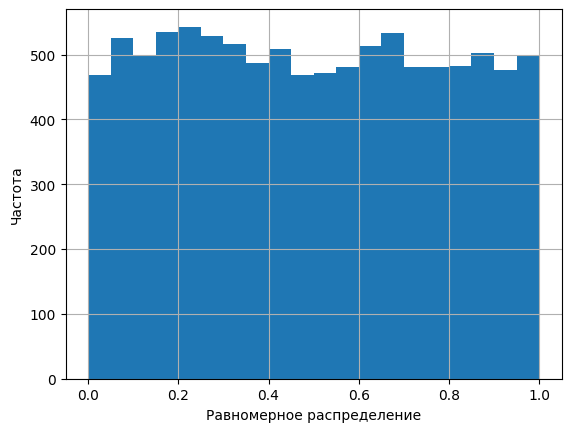

In [42]:
ex_1_15()

Если напротив сгенерировать гистограмму средних значений последовательностей чисел, то в результате получится распределение, которое выглядит совсем непохоже.

In [45]:
def bootstrap(xs, n, replace=True):
    '''Вернуть список массивов меньших размеров
       по n элементов каждый'''
    return np.random.choice(xs, (len(xs), n), replace=replace)

def ex_1_16():
    '''Построить гистограмму средних значений'''
    xs = stats.uniform.rvs(loc=0, scale=1, size=10000)
    pd.Series( map(np.mean, bootstrap(xs, 10)) ).hist(bins=20)
    plt.xlabel('Распределение средних значений')
    plt.ylabel('Частота')
    plt.show()

Приведенный выше пример сгенерирует результат, аналогичный следующей ниже гистограмме:

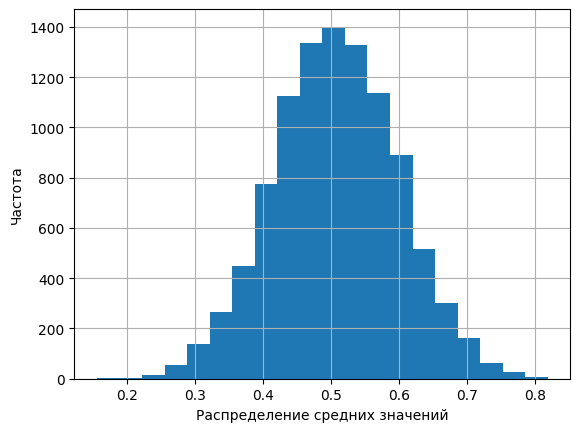

In [46]:
ex_1_16()

Этот результат, когда средний эффект множества мелких случайных колебаний в итоге приводит к нормальному распределению, называется *центральной предельной теоремой*, иногда сокращенно *ЦПТ*, и играет важную роль для объяснения, почему нормальное распределение встречается так часто в природных явлениях.

В отличие от центральной предельной теоремы, которая позволяет получать выборки из приближенно нормального распределения, библиотека scipy содержит функции для эффективного генерирования выборок из самых разнообразных статистических распределений, включая нормальное:

In [47]:
def ex_1_17():
    '''Показать гистограмму нормального распределения
       синтетического набора данных'''
    xs = stats.norm.rvs(loc=0, scale=1, size=10000)
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Нормальное распределение')
    plt.ylabel('Частота')
    plt.show()

Отметим, что в функции `sp.random.normal` параметр `loc` – это среднее значение, `scale` – дисперсия и `size` – размер выборки. Приведенный выше пример сгенерирует следующую гистограмму нормального распределения:

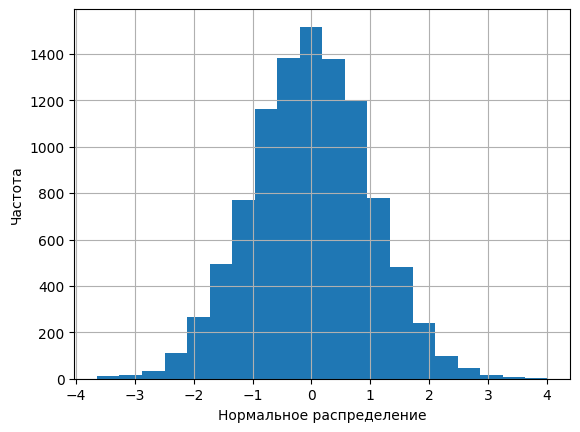

In [48]:
ex_1_17()

**Как сравнивать распределения. От визуализации до статистических тестов**

Мы смоделировали набор данных на 1000 человек, для которых мы наблюдаем набор характеристик.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Обновлённая функция генерации данных
def generate_data_updated(n=1000):
    np.random.seed(42)  # Для воспроизводимости

    # Генерация групп с разным размером
    groups = np.random.choice(['control', 'treatment'], size=n, p=[0.7, 0.3])  # 70% контроль, 30% эксперим.
    arms = np.where(groups == 'treatment', np.random.choice(['arm 1', 'arm 2', 'arm 3', 'arm 4'], size=n), np.nan)
    genders = np.random.choice([0, 1], size=n, p=[0.49, 0.51])  # 49% male, 51% female
    ages = np.where(groups == 'control',
                    np.random.normal(loc=32, scale=8, size=n),  # Увеличенный возраст для контроля
                    np.random.normal(loc=36, scale=7, size=n))  # Увеличенный возраст для эксперимента
    ages = ages.round(1)

    # Разное распределение доходов для групп
    incomes = np.where(groups == 'control',
                       np.random.normal(loc=525, scale=117, size=n),  # Контрольная группа
                       np.random.normal(loc=540, scale=160, size=n))  # Экспериментальная группа
    incomes = incomes.round(2)

    # Создание DataFrame
    df = pd.DataFrame({
        'Group': groups,
        'Arm': arms,
        'Gender': genders,
        'Age': ages,
        'Income': incomes
    })
    return df

# Генерация обновлённых данных
df = generate_data_updated()

# Отображение первых строк
print(df.head())

       Group    Arm  Gender   Age  Income
0    control    nan       1  36.2  530.77
1  treatment  arm 4       0  28.6  589.45
2  treatment  arm 2       0  44.6  435.09
3    control    nan       0  32.7  567.48
4    control    nan       0  30.4  561.40


Для большинства визуализаций я буду использовать библиотеку Python [seaborn](https://seaborn.pydata.org/).

Эта диаграмма предоставляет сводную статистику (ящик и «усы»), а также прямую визуализацию данных — выбросы:

Text(0.5, 1.0, 'Boxplot')

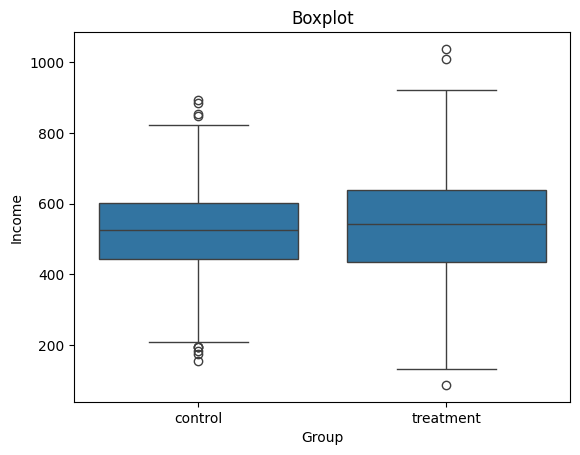

In [150]:
import seaborn as sns
sns.boxplot(data=df, x='Group', y='Income')
plt.title("Boxplot")

Гистограмма группирует данные в интервалы («бины») одинаковой ширины и отображает количество наблюдений в каждом интервале.

Text(0.5, 1.0, 'Histogram')

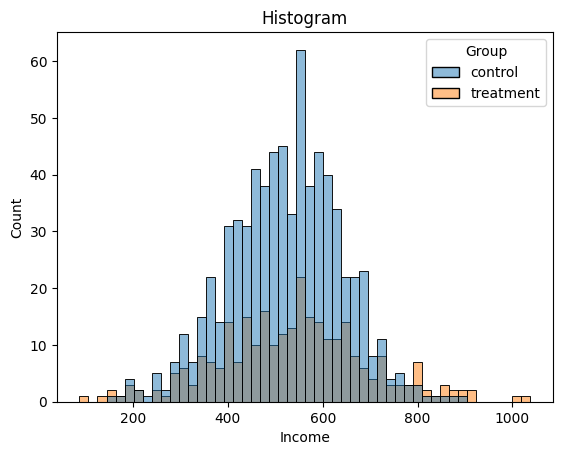

In [151]:
sns.histplot(data=df, x='Income', hue='Group', bins=50)
plt.title("Histogram")

С этими диаграммами есть несколько проблем:

* Количество наблюдений в группах разное, поэтому гистограммы несопоставимы.

* Количество бинов произвольное.

Решить первую проблему можно через параметр stat для построения диаграммы плотности вместо количества и установив для параметра common_norm значение False, чтобы нормализовать каждую гистограмму отдельно.

Text(0.5, 1.0, 'Density Histogram')

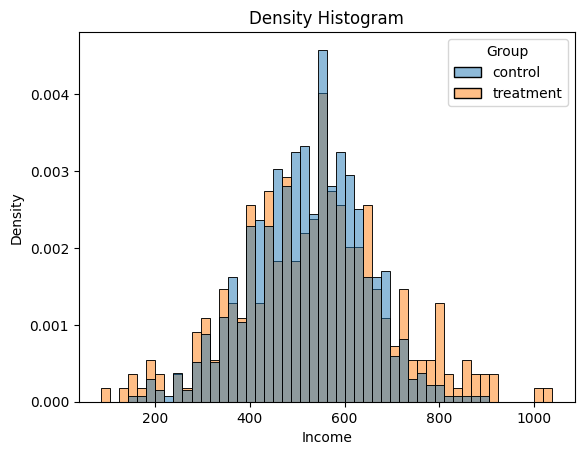

In [152]:
sns.histplot(data=df, x='Income', hue='Group', bins=50, stat='density', common_norm=False)
plt.title("Density Histogram")

Одно из возможных решений — использовать метод ядерной оценки плотности, который пытается аппроксимировать гистограмму непрерывной функцией при помощи ядерной оценки плотности (KDE).

Text(0.5, 1.0, 'Kernel Density Function')

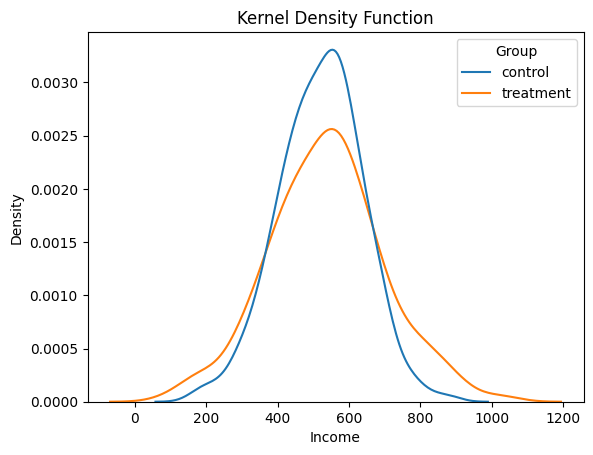

In [153]:
sns.kdeplot(x='Income', data=df, hue='Group', common_norm=False)
plt.title("Kernel Density Function")

Основные преимущества кумулятивной функции распределения заключаются в том, что:

* не нужно выбирать произвольно (например, количество бинов);

* не нужна никакая аппроксимация (как с ядерной оценкой плотности), но мы представляем все точки данных.

Text(0.5, 1.0, 'Cumulative distribution function')

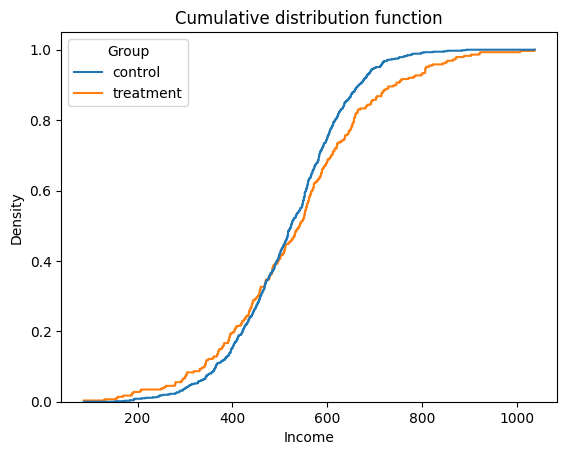

In [154]:
sns.histplot(x='Income', data=df, hue='Group', bins=len(df), stat="density",
      element="step", fill=False, cumulative=True, common_norm=False)
plt.title("Cumulative distribution function")

Как же интерпретировать график?

* Две линии пересекаются примерно в точке 0,4 (ось Y), а значит, их медианы cхожи

* Оранжевая линия выше синей линии слева и ниже этой линии справа: распределение экспериментальной группы имеет более толстые хвосты.

В Python нет встроенной функции графика квантиль–квантиль, и, хотя пакет statsmodels предоставляет функцию [qqplot](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html), он довольно громоздкий.

Во-первых, вычислим квартили двух групп функцией percentile.

In [155]:
income = df['Income'].values
income_t = df.loc[df.Group=='treatment', 'Income'].values
income_c = df.loc[df.Group=='control', 'Income'].values

df_pct = pd.DataFrame()
df_pct['q_treatment'] = np.percentile(income_t, range(100))
df_pct['q_control'] = np.percentile(income_c, range(100))

Теперь можно построить два распределения квантилей относительно друг друга, а как эталон взять линию под углом около 45 градусов:

Text(0.5, 1.0, 'QQ plot')

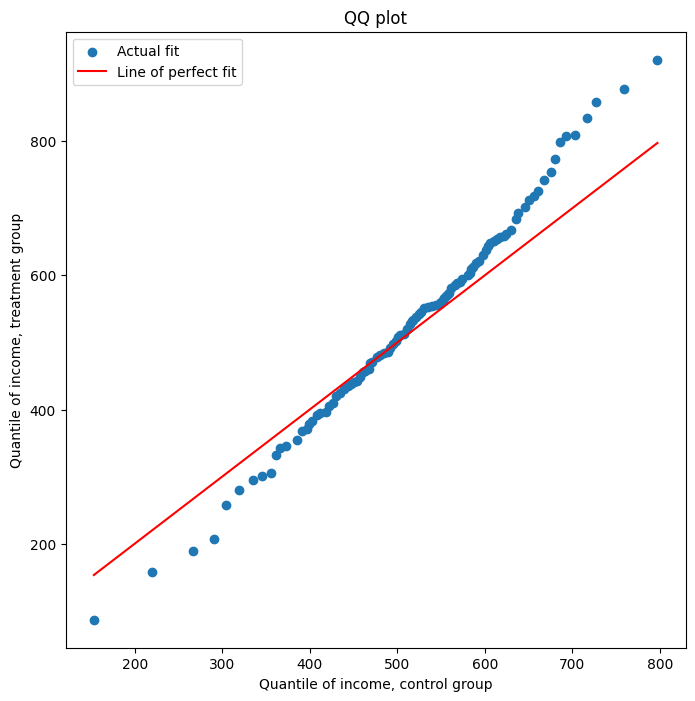

In [156]:
plt.figure(figsize=(8, 8))
plt.scatter(x='q_control', y='q_treatment', data=df_pct, label='Actual fit')
sns.lineplot(x='q_control', y='q_control', data=df_pct, color='r', label='Line of perfect fit')
plt.xlabel('Quantile of income, control group')
plt.ylabel('Quantile of income, treatment group')
plt.legend()
plt.title("QQ plot")

Статистика теста для теста сравнения двух средних определяется таким образом:

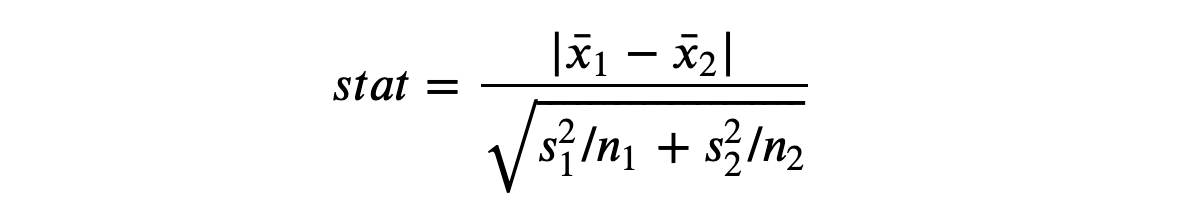

Функция ttest_ind из scipy возвращает тестовую статистику и предполагаемое p-значение.

In [145]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(income_c, income_t)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=0.8080, p-value=0.4193


Как следует из названия метода стандартизация разности средних (SMD), это не строго тестовая статистика, а просто стандартизированная разница, вычислить которую можно так:

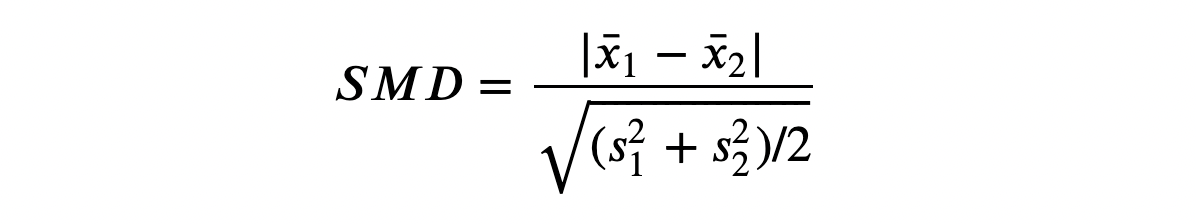

Хорошая практика — собрать средние значения всех переменных в экспериментальной и контрольной группах, а также измерить расстояния между ними — либо t-критерий, либо SMD — и занести в так называемую балансовую таблицу, для создания которой можно воспользоваться функцией [create_table_one](https://causalml.readthedocs.io/en/latest/causalml.html#module-causalml.match) из библиотеки [causalml](https://causalml.readthedocs.io/en/latest/about.html). Как следует из названия функции, балансовая таблица всегда должна быть первой таблицей, которую вы представляете при выполнении A/B-тестирования.

In [147]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstall

In [157]:
from causalml.match import create_table_one

df['treatment'] = df['Group']=='treatment'
create_table_one(df, 'treatment', ['Gender', 'Age', 'Income'])

,Control,Treatment,SMD
Variable,,,
n,712,288,
Age,32.33 (7.72),36.08 (7.30),0.4994
Gender,0.52 (0.50),0.50 (0.50),-0.0406
Income,520.73 (118.62),536.26 (161.70),0.1095


И вот процедура расчёта U-критерия Манна-Уитни:

1. Объедините все точки данных и ранжируйте их в порядке возрастания или убывания.

1. Вычислите U₁ = R₁ − n₁(n₁ + 1)/2, где R₁ — сумма рангов точек данных в первой группе, а n₁ — количество точек в первой группе.

1. Аналогично вычислите U₂ для второй группы.

1. Тестовая статистика рассчитывается как stat = min(U₁, U₂).

Мы проводим тест при помощи mannwhitneyu из scipy:

In [158]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(income_t, income_c)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann–Whitney U Test: statistic=107818.5000, p-value=0.2009


Давайте использовать в качестве тестовой статистики разницу в выборочных средних между экспериментальной и контрольной группами.

In [159]:
sample_stat = np.mean(income_t) - np.mean(income_c)
stats = np.zeros(1000)
for k in range(1000):
  labels = np.random.permutation((df['Group'] == 'treatment').values)
  stats[k] = np.mean(income[labels]) - np.mean(income[labels==False])
p_value = np.mean(stats > sample_stat)

print(f"Permutation test: p-value={p_value:.4f}")

Permutation test: p-value=0.0630


Тест можно визуализировать: построить диаграмму распределения статистики теста по перестановкам в зависимости от его выборочного значения.

Text(0.5, 1.0, 'Permutation Test')

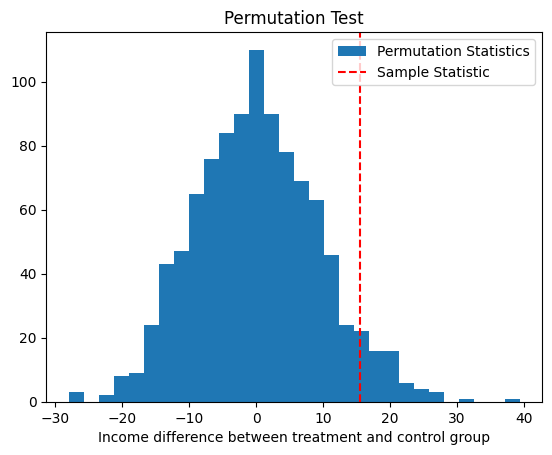

In [160]:
plt.hist(stats, label='Permutation Statistics', bins=30)
plt.axvline(x=sample_stat, c='r', ls='--', label='Sample Statistic')
plt.legend()
plt.xlabel('Income difference between treatment and control group')
plt.title('Permutation Test')

Мы генерируем ячейки, соответствующие децилям распределения дохода в контрольной группе, а затем вычисляем ожидаемое количество наблюдений в каждой ячейке в экспериментальной группе, если два распределения были одинаковыми.

In [161]:
# Инициализируем dataframe
df_bins = pd.DataFrame()

# Сгенерировать ячейки из контрольной группы
_, bins = pd.qcut(income_c, q=10, retbins=True)
df_bins['bin'] = pd.cut(income_c, bins=bins).value_counts().index

# Применить ячейки к обеим группам
df_bins['income_c_observed'] = pd.cut(income_c, bins=bins).value_counts().values
df_bins['income_t_observed'] = pd.cut(income_t, bins=bins).value_counts().values

# Рассчитать ожидаемую частоту в экспериментальной группе лечения
df_bins['income_t_expected'] = df_bins['income_c_observed'] / np.sum(df_bins['income_c_observed']) * np.sum(df_bins['income_t_observed'])

df_bins

,bin,income_c_observed,income_t_observed,income_t_expected
0,"(153.33, 366.062]",71,35,28.060478
1,"(366.062, 422.144]",71,29,28.060478
2,"(422.144, 460.365]",71,27,28.060478
3,"(460.365, 494.888]",71,20,28.060478
4,"(494.888, 524.755]",71,19,28.060478
5,"(524.755, 555.888]",71,26,28.060478
6,"(555.888, 583.874]",71,25,28.060478
7,"(583.874, 617.466]",71,24,28.060478
8,"(617.466, 667.61]",71,32,28.060478
9,"(667.61, 893.79]",72,44,28.455696


Тестовая статистика задаётся следующим образом:
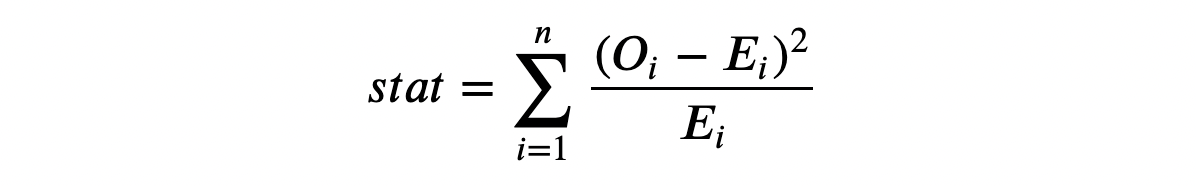

Чтобы вычислить статистику теста и p-значение теста, воспользуемся функцией chisquare из scipy:

In [162]:
from scipy.stats import chisquare

stat, p_value = chisquare(df_bins['income_t_observed'], df_bins['income_t_expected'])
print(f"Chi-squared Test: statistic={stat:.4f}, p-value={p_value:.4f}")

Chi-squared Test: statistic=17.1457, p-value=0.0465


Статистика теста Колмогорова — Смирнова представляет собой максимальную абсолютную разницу между двумя кумулятивными распределениями.

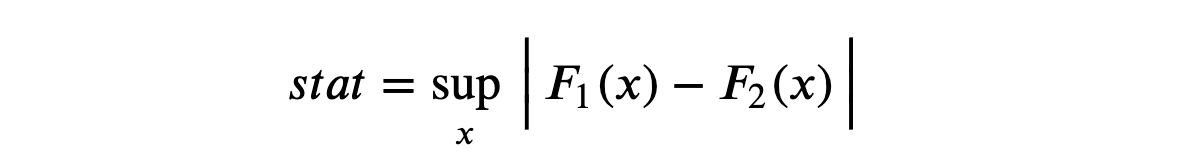

Во-первых, вычислим кумулятивные функции распределения.

In [163]:
df_ks = pd.DataFrame()
df_ks['Income'] = np.sort(df['Income'].unique())
df_ks['F_control'] = df_ks['Income'].apply(lambda x: np.mean(income_c<=x))
df_ks['F_treatment'] = df_ks['Income'].apply(lambda x: np.mean(income_t<=x))
df_ks.head()

,Income,F_control,F_treatment
0,86.72,0.000000,0.003472
1,131.43,0.000000,0.006944
2,153.33,0.001404,0.006944
3,155.41,0.001404,0.010417
4,158.51,0.001404,0.013889


Теперь нужно найти точку, где абсолютное расстояние между кумулятивными функциями распределения наибольшее.

In [164]:
k = np.argmax( np.abs(df_ks['F_control'] - df_ks['F_treatment']))
ks_stat = np.abs(df_ks['F_treatment'][k] - df_ks['F_control'][k])

Можно также визуализировать значение тестовой статистики: построить две кумулятивные функции распределения и значение тестовой статистики.

Text(0.5, 1.0, 'Kolmogorov-Smirnov Test')

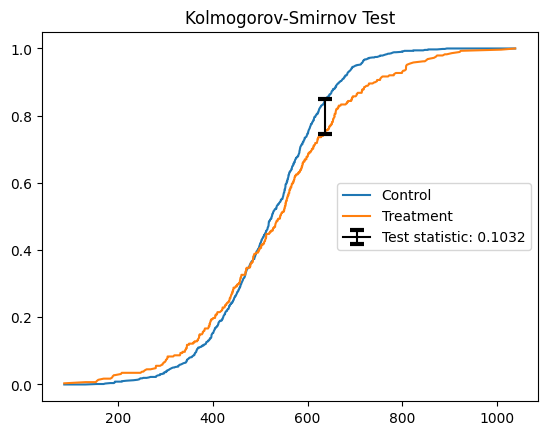

In [165]:
y = (df_ks['F_treatment'][k] + df_ks['F_control'][k])/2
plt.plot('Income', 'F_control', data=df_ks, label='Control')
plt.plot('Income', 'F_treatment', data=df_ks, label='Treatment')
plt.errorbar(x=df_ks['Income'][k], y=y, yerr=ks_stat/2, color='k',
      capsize=5, mew=3, label=f"Test statistic: {ks_stat:.4f}")
plt.legend(loc='center right')
plt.title("Kolmogorov-Smirnov Test")

А теперь можно выполнить сам тест, используя функцию kstest из scipy.

In [166]:
from scipy.stats import kstest

stat, p_value = kstest(income_t, income_c)
print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Kolmogorov-Smirnov Test: statistic=0.1032, p-value=0.0233


Диаграмма размаха масштабируется очень хорошо, когда у нас есть несколько групп из однозначных чисел: разные блоки можно расположить рядом.

Text(0.5, 1.0, 'Boxplot, multiple groups')

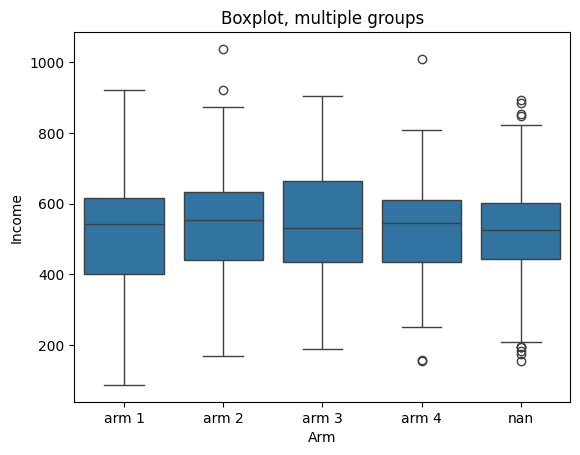

In [167]:
sns.boxplot(x='Arm', y='Income', data=df.sort_values('Arm'))
plt.title("Boxplot, multiple groups")

По умолчанию внутри скрипичной диаграммы добавляется миниатюрная диаграмма.

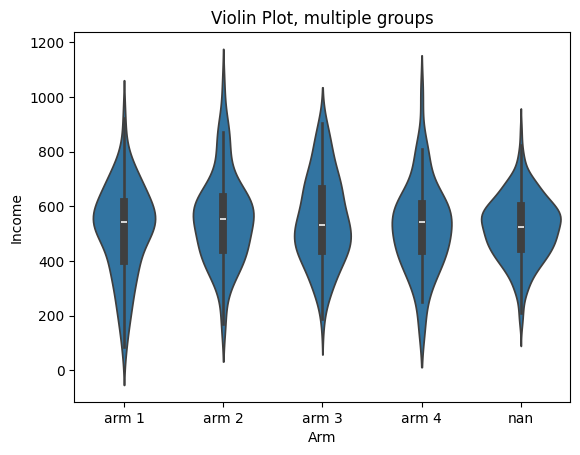

In [168]:
sns.violinplot(x='Arm', y='Income', data=df.sort_values('Arm'))
plt.title("Violin Plot, multiple groups")

Импортировать групповую хребтовую диаграмму нужно из [joypy](https://github.com/leotac/joypy).

In [169]:
!pip install joypy

Text(0.5, 1.0, 'Ridgeline Plot, multiple groups')

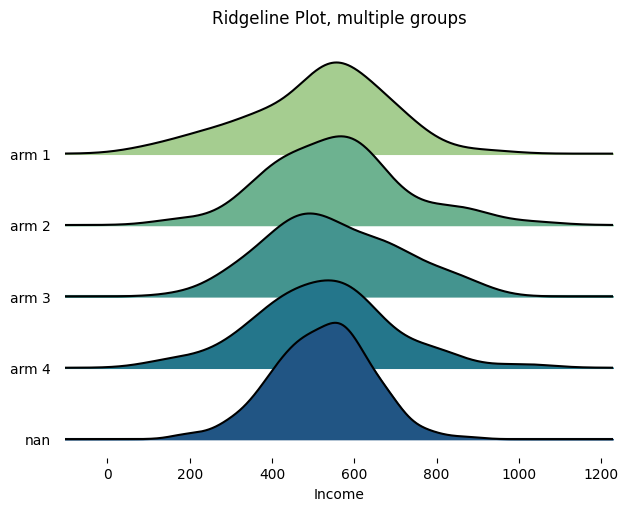

In [170]:
from joypy import joyplot

joyplot(df, by='Arm', column='Income', colormap=sns.color_palette("crest", as_cmap=True))
plt.xlabel('Income')
plt.title("Ridgeline Plot, multiple groups")

Статистика F-теста определяется как:

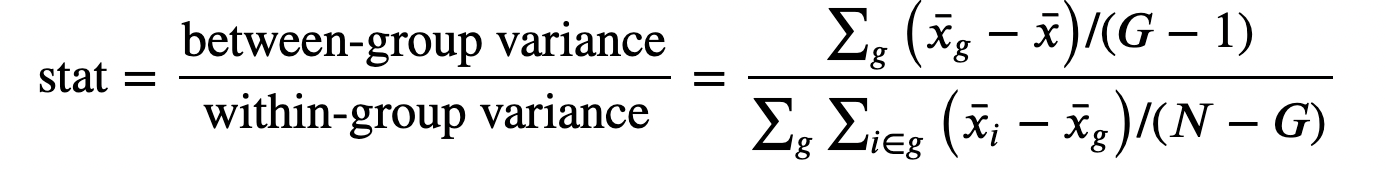

При нулевой гипотезе о независимости группы f-статистика обладает F-распределением.

In [171]:
from scipy.stats import f_oneway

income_groups = [df.loc[df['Arm']==arm, 'Income'].values for arm in df['Arm'].dropna().unique()]
stat, p_value = f_oneway(*income_groups)
print(f"F Test: statistic={stat:.4f}, p-value={p_value:.4f}")

F Test: statistic=1.9291, p-value=0.1034


**HDTree: настраиваемое дерево решений**

Это задание разделено на три части следующим образом:

* Выясняем, почему стоит потратить своё время, чтобы придумать собственную реализацию деревьев решений. Будут перечислены некоторые из его функций, но также недостатки текущей реализации.
* Базовое использование HDTree с помощью фрагментов кода и объяснений некоторых деталей по ходу дела.
* Подсказки о том, как настроить и расширить HDTree вашими идеями.

Цель человека, составлявшего этот пример, — реализовать ориентированную на человека ML-модель, где *HDTree* (Human Decision Tree, если на то пошло) — это дополнительный ингредиент, который применяется как часть реального пользовательского интерфейса для этой модели.

Существует реализация деревьев решений `scikit-learn`. Реализация `sckit-learn` имеет множество плюсов:

* Она быстра и оптимизирована;
* Написана на диалекте Cython. Cython компилируется в C-код (который, в свою очередь, компилируется в двоичный код), сохраняя при этом возможность взаимодействия с интерпретатором Python;
* Простая и удобная;
* Многие люди в ML знают, как работать с моделями `scikit-learn`. Вам помогут везде благодаря его пользовательской базе;
* Она испытана в боевых условиях (её используют многие);
* Она просто работает;
* Она поддерживает множество методов предварительной и последующей обрезки и предоставляет множество функций (например, обрезка с минимальными затратами и весами выборки);
* Поддерживает базовую визуализацию.

Тем не менее, у нее, безусловно, есть некоторые недостатки:

* Ее нетривиально изменять, отчасти из-за использования довольно необычного диалекта Cython (см. преимущества выше);
* Нет возможности учитывать знания пользователей о предметной области или изменить процесс обучения;
* Визуализация достаточно минималистичная;
* Нет поддержки категориальных признаков;
* Нет поддержки отсутствующих значений;
* Интерфейс для доступа к узлам и обхода дерева громоздок и не понятен интуитивно;
* Нет поддержки отсутствующих значений;
* Только двоичные разбиения (смотрите ниже);
* Нет многовариантных разбиений (смотрите ниже).

Мы вернемся к моментам, где HDTree жертвует многими преимуществами реализации scikit-learn позже, поэтому не беспокойтесь, если вы еще не понимаете весь следующий список:

* Взаимодействует с обучающим поведением;
* Основные компоненты имеют модульную структуру и их довольно легко расширить (реализовать интерфейс);
* Написана на чистом Python (более доступна);
* Имеет богатую визуализацию;
* Поддерживает категориальные данные;
* Поддерживает отсутствующие значения;
* Поддерживает многовариантные разделения;
* Имеет удобный интерфейс навигации по структуре дерева;
* Поддерживает n-арное разбиение (больше 2 дочерних узлов);
* Текстовые представления путей решения;
* Поощряет объясняемость за счет печати удобочитаемого текста.

Минусы:

* Медленная;
* Не проверена в боях;
* Качество ПО посредственно;
* Не так много вариантов обрезки. Хотя реализация поддерживает некоторые основные параметры.

Какие возможны варианты применения?

* Извлечение знаний из данных;
* Проверка интуитивного представление о данных;
* Понимание внутренней работы деревьев решений;
* Изучение альтернативных причинно-следственных связей в отношении вашей проблемы обучения;
* Использование в качестве части более сложных алгоритмов;
* Создание отчётов и визуализация;
* Использование для любых исследовательских целей;
* В качестве доступной платформы, чтобы легко проверить ваши идеи для алгоритмов дерева решений.

На следующем рисунке показан фактический результат работы HDTree (за исключением маркеров).

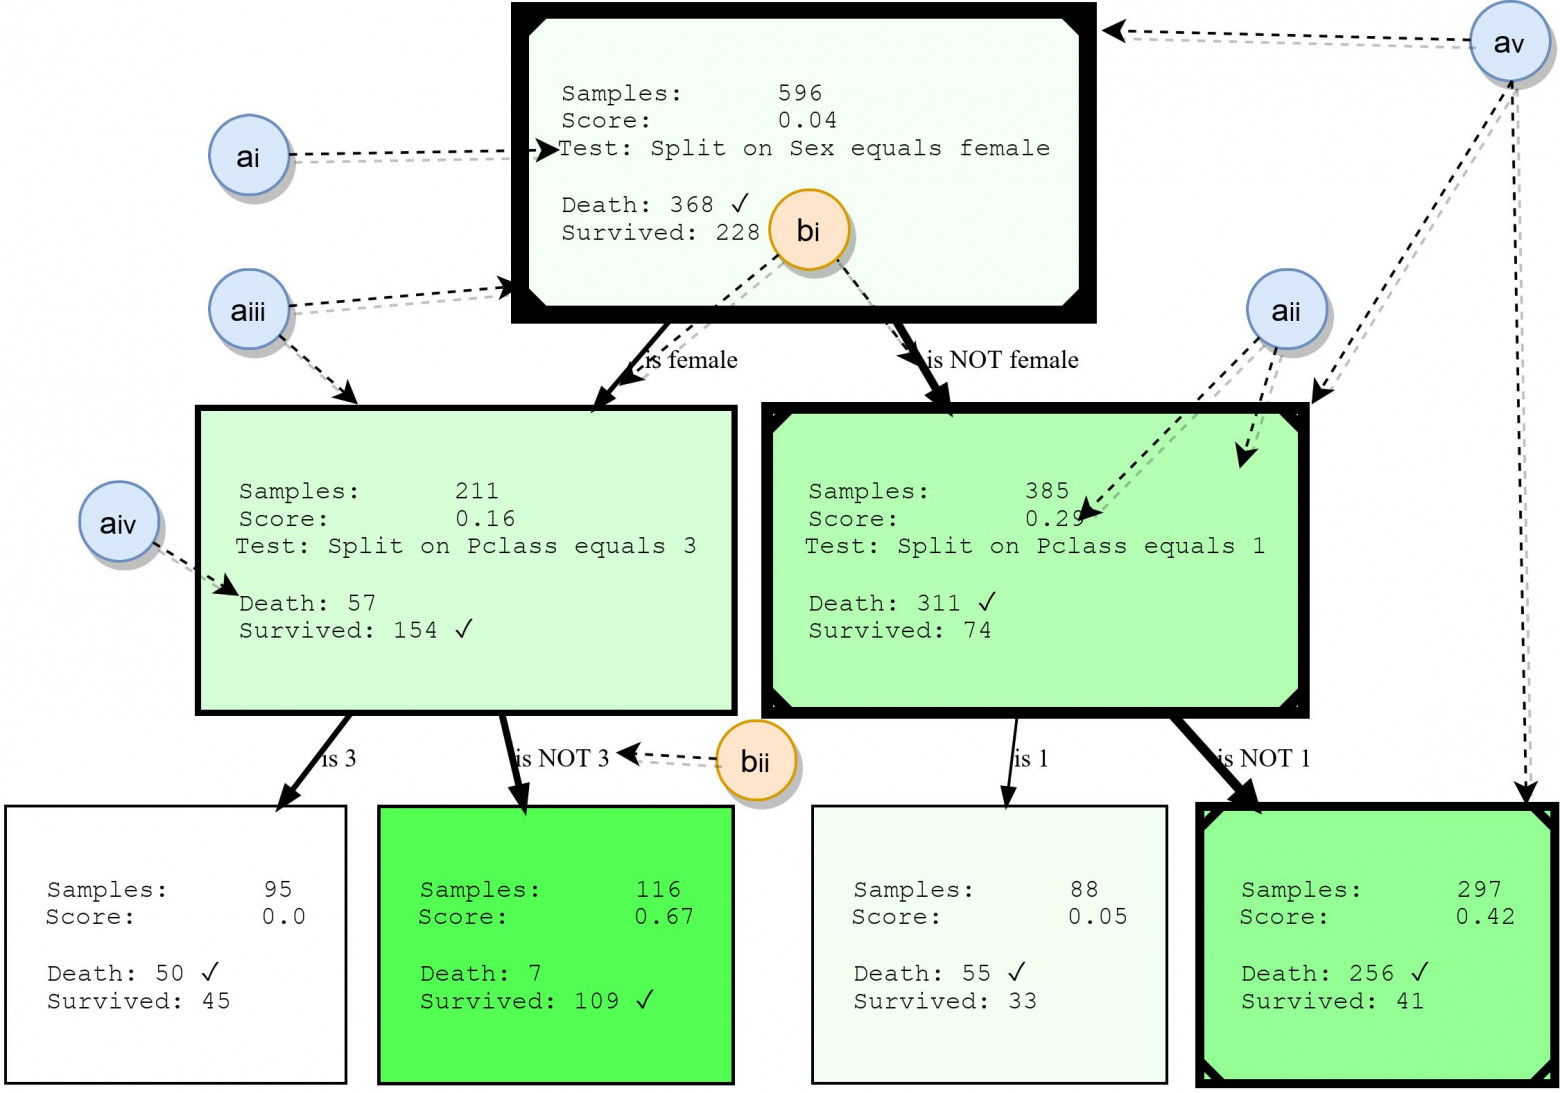

Узлы

* ai: текстовое описание правила проверки и разделения, которое использовалось на этом узле для разделения данных на его дочерние элементы. Отображает соответствующий атрибуты и словесное описание операции. Эти тесты *легко настраиваются* и могут включать любую логику разделения данных. Разработка собственных пользовательских правил поддерживается за счет реализации интерфейса. Подробнее об этом в разделе 3.
* aii: оценка узла измеряет его чистоту, то есть то, насколько хорошо данные, проходящие через узел, разделены. Чем выше оценка, тем лучше. Записи также представлены цветом фона узлов. Чем больше зеленоватого оттенка, тем выше оценка (белый цвет означает нечистые, т.е. равномерно распределенные классы). Эти оценки направляют построение дерева и являются модульным и заменяемым компонентом HDTree.
* aiii: рамка узлов указывает на то, сколько точек данных проходит через этот узел. Чем толще граница, тем больше данных проходит через узел.
* aiv: список целей прогнозирования и меток, которые имеют точки данных, проходящие через этот узел. Самый распространенный класс отмечен .
* av: опционально визуализация может отмечать путь, по которому следуют отдельные точки данных (иллюстрируя решение, которое принимается, когда точка данных проходит дерево). Это отмечено линией в углу дерева решений.

Ребра

* bi: стрелка соединяет каждый возможный результат разделения (ai) с его дочерними узлами. Чем больше данных относительно родителя «перетекает» по краю, тем толще они отображаются.
* bii: каждое ребро имеет удобочитаемое текстовое представление соответствующего результата разбиения.

К этому моменту вы уже можете задаться вопросом, чем отличается HDTree от дерева `scikit-learn` (или любой другой реализации) и почему мы можем захотеть иметь разные виды разделений?

Может быть, у вас есть интуитивное понимание понятия *пространство признаков*.

Задача **алгоритма классификации** теперь состоит в том, чтобы **разделить** это **пространство** на не перекрывающиеся области и **присвоить** этим областям класс.

Поскольку нашему мозгу трудно возиться с высокой размерностью, мы будем придерживаться двухмерного примера и очень простой задачи с двумя классами, вот так:

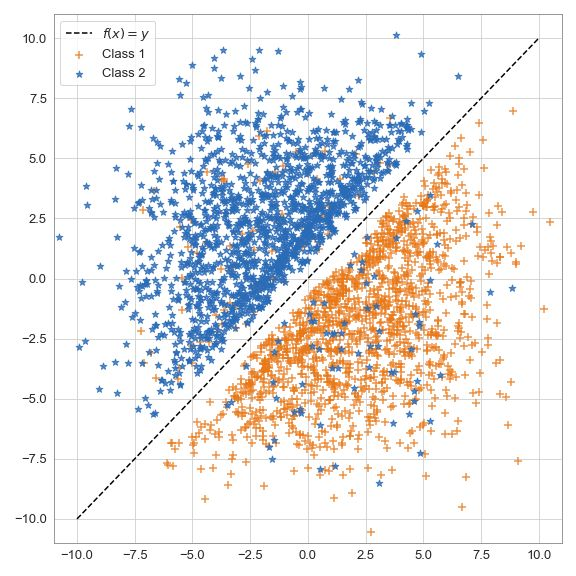

Улица, которая является просто линейной функцией `f(x) = y` разделяет эти два класса: *Class 1* (правая нижняя) и *Class 2* (левая верхняя) части.

Задача алгоритма классификации, такого как HDTree (хотя он также может использоваться для *задач регрессии*), состоит в том, чтобы узнать, к какому классу принадлежит каждая точка данных. Другими словами, задана пара координат `(x, y)` вроде `(6, 2)`.

«Это класс 1, если *x > y*, иначе класс 2». Идеальное разделение создаст функция `y=x`, показанная пунктиром.

Но давайте посмотрим, какие деревья решений решают вопрос иначе:

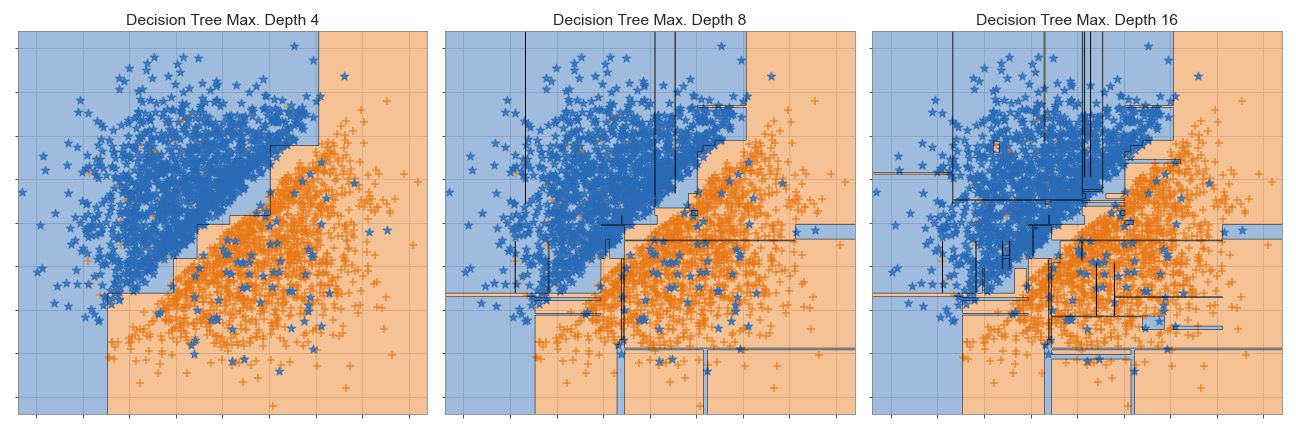

Они все работают по схеме `attribute < threshold`, что приведет к **гиперплоскостям, которые параллельны осям**.

Точность деревьев составляет 93,84%, 93,03%, 90,81% для **тестового набора** и 94,54%, 96,57%, 98,81% для **тренировочного набора** (упорядочены по глубине деревьев 4, 8, 16). Тогда как **точность в тесте уменьшается, точность обучения увеличивается**.

Самое простое из деревьев (глубина 4), визуализированное с помощью scikit learn, уже выглядит так:

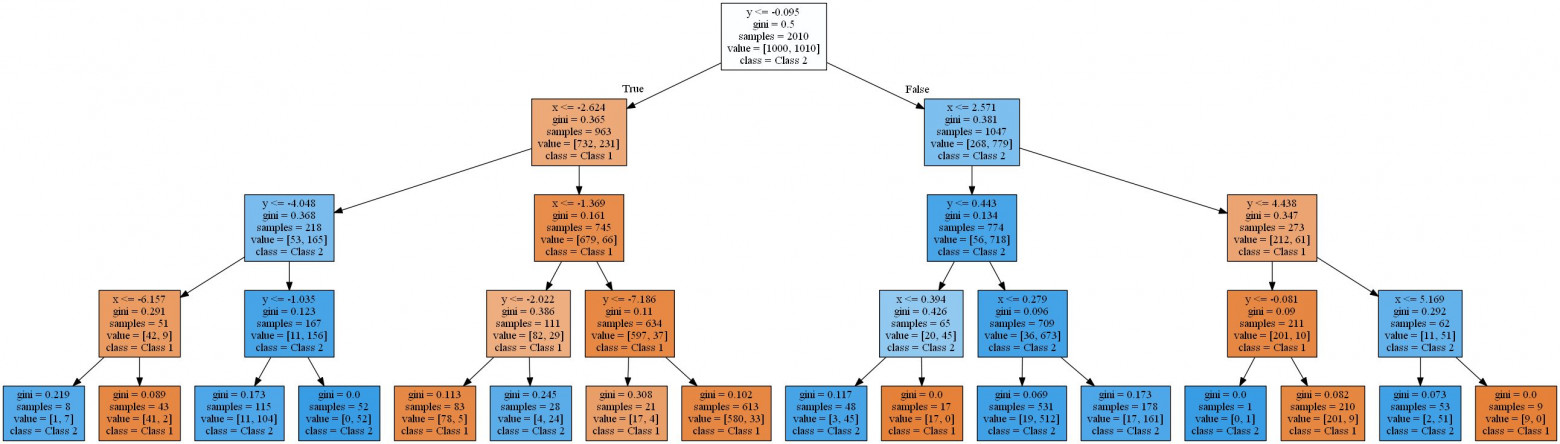

**HDTree** позволит пользователю **применять знания** о данных (точно так же, как знание о линейном разделении в примере).

Установка HDTree немного сложнее, чем `pip install hdtree`. Для начала нужен Python 3.5 или новее.

* Создайте пустой каталог и внутри него папку с именем hdtree (`your_folder/hdtree`)
* Клонируйте [репозиторий](https://github.com/Mereep/HDTree) в каталог hdtree (не в другой подкаталог).
* Установите необходимые зависимости: `numpy`, `pandas`, `graphviz`, `sklearn`.
* Добавьте `your_folder` в `PYTHONPATH`. Это включит директорию в механизм импорта Python. Вы сможете использовать его как обычный пакет Python.

В качестве альтернативы добавьте `hdtree` в папку `site-packages` вашей установки `python`.

Давайте сразу начнем с кода:

In [1]:
import os

# Укажите основной каталог
base_dir = "/content/your_folder"
hdtree_dir = os.path.join(base_dir, "hdtree")

# Создайте каталог и папку hdtree
os.makedirs(hdtree_dir, exist_ok=True)
print(f"Каталог создан: {hdtree_dir}")

Каталог создан: /content/your_folder/hdtree


In [2]:
!git clone https://github.com/Mereep/HDTree.git /content/your_folder/hdtree

Cloning into '/content/your_folder/hdtree'...
remote: Enumerating objects: 310, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 310 (delta 199), reused 288 (delta 177), pack-reused 0 (from 0)
Receiving objects: 100% (310/310), 971.29 KiB | 6.03 MiB/s, done.
Resolving deltas: 100% (199/199), done.


In [3]:
!ls /content/your_folder/hdtree

examples  __init__.py  readme.md  requirements.txt  src  unittests


In [4]:
!pip install numpy pandas graphviz scikit-learn

In [13]:
import sys
sys.path.append('/content/your_folder')  # Убедитесь, что путь правильный
from hdtree.src.hdtree import HDTreeClassifier

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from typing import Tuple
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
from mlxtend.plotting import plot_decision_regions
import graphviz
from hdtree import HDTreeClassifier, EntropyMeasure, SmallerThanSplit, TwentyQuantileSplit, TwentyQuantileRangeSplit, SingleCategorySplit, FixedValueSplit
import pandas as pd
%load_ext autoreload
%autoreload 2

In [17]:
def generate_example_data() -> Tuple[np.ndarray, np.ndarray]:

    def shift(x, y):
        # немного отодвинуть данные от улицы
        street_size = .75
        if abs(x-y) < street_size: # почти на границе
            if x < y:
                x-=street_size
                y+=street_size
            else:
                y-=street_size
                x+=street_size

        return [x,y]

    # генерировать нормально распределенные данные
    np.random.seed(1)
    x_data_decision_tree = np.array([[np.random.rand(1)[0]*10-5+np.random.normal(scale=2),
                                      np.random.rand(1)[0]*10-5+np.random.normal(scale=2)] for x in range(3000)])

    # освободить улицу в середине
    x_data_decision_tree = np.array([*map(lambda xy: shift(*xy), x_data_decision_tree)])

    # маркируйте его как положительный и отрицательный соответственно
    y_data_decision_tree = np.array([*map(lambda pos: 1 if pos[0] < pos[1] else 0, x_data_decision_tree)])

    # изменить некоторые метки случайным образом
    y_data_decision_tree = np.array(
        [cls if np.random.rand() < 0.95 else (1 if cls == 0 else 0) for cls in y_data_decision_tree])

    return x_data_decision_tree, y_data_decision_tree

In [18]:
X_street, y_street = generate_example_data()
X_street_train, X_street_test, y_street_train, y_street_test = train_test_split(X_street, y_street, test_size=.33)

In [14]:
from hdtree import HDTreeClassifier, SmallerThanSplit, EntropyMeasure
hdtree_linear = HDTreeClassifier(allowed_splits=[SmallerThanSplit.build()],
    information_measure=EntropyMeasure(),
    attribute_names=['x', 'y'])

In [19]:
hdtree_linear.fit(X_street_train, y_street_train)

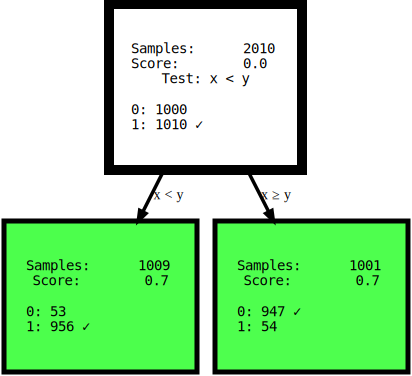

In [20]:
hdtree_linear.generate_dot_graph()

Этот искусственный пример проясняет мысль: иметь интуитивное представление о данных или просто предоставлять дерево решений с различными вариантами разделения пространства признаков, которое может предложить **более простое, а иногда даже более точное решение**.

Какую интерпретацию вы **сможете понять** первой, а какой **больше доверяете**?

При инициализации `HDTreeClassifier` самое важное, что вы должны предоставить, — это `allowed_splits`.

В этом случае мы предоставили исключительно `SmallerThanSplit`. Это разделение делает именно то, что вы видите: оно принимает два атрибута (пробует любую комбинацию) и разделяет данные по схеме `a_i < a_j`.

Этот тип разделения обозначается как **многовариантное разделение**. Оно означает, что разделение использует **более одного признака** для принятия решения. Это не похоже на ***одновариантное разделение***, которое используются в большинстве других деревьев, таких как `scikit-tree` (подробнее см. выше), которые принимают во внимание ровно один атрибут. Конечно, у `HDTree` также есть опции для достижения «нормального разделения», как те, что есть в scikit-деревьях — семейство `QuantileSplit`.

Другая незнакомая вещь, которую вы можете увидеть в коде — гиперпараметр `information_measure`.

Возможно, вы также слышали о *коэффициенте Джини*, который был бы еще одним допустимым вариантом. Конечно же, вы можете **предоставить своё собственное измерение**, просто реализовав соответствующий интерфейс. Если хотите, реализуйте *gini-Index*, который вы можете использовать в дереве, не реализовывая заново ничего другого. Просто скопируйте `EntropyMeasure()` и адаптируйте для себя. **Давайте копнем глубже, в катастрофу Титаника.**

Данные выглядят так:

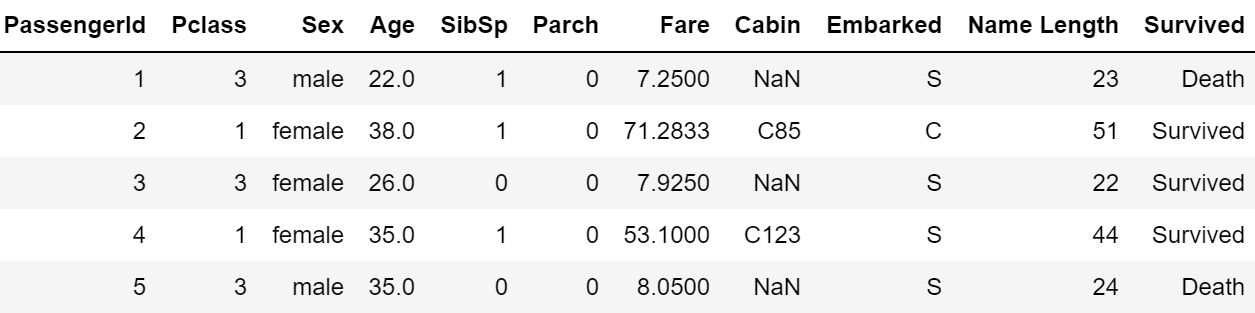

Описание атрибутов-значений вы найдёте [здесь](https://www.kaggle.com/c/titanic/data?ref=habr.com). Изучая ML-учебники и применяя этот набор данных, вы выполняете все виды *предварительной обработки*, чтобы иметь возможность работать с обычными моделями машинного обучения, например, удаляя отсутствующие значения `NaN` путём замещения значений, отбрасывания строк/столбцов, унитарным кодированием категориальных данных (например, `Embarked` и `Sex` или группировки данных, чтобы получить валидный набор данных, который принимает ML-модель.

**Вы можете подавать данные как есть**, и модель с радостью примет их.

Базовый код похож на код выше, однако в этом примере будет разрешено гораздо больше разделений данных.

In [37]:
df_titanic = pd.read_csv("train.csv")

In [38]:
df_titanic['Name Length'] = df_titanic['Name'].map(lambda name: len(name))
y_titanic = df_titanic['Survived'].map(lambda s: 'Survived' if s == 1 else 'Death').astype(str)

In [39]:
print(y_titanic_train.unique())  # Должно быть ['Survived', 'Death']
print(y_titanic_test.unique())  # Должно быть ['Survived', 'Death']

['S' 'Q' 'C' nan]
['C' 'S' 'Q' nan]


In [40]:
del df_titanic['Name']
del df_titanic['Ticket']
del df_titanic['Survived']

In [41]:
df_titanic['Survived'] = y_titanic

In [42]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(df_titanic.iloc[:,:-1],
                                                                                    df_titanic.iloc[:,-1], test_size=0.33,
                                                                                    random_state=42)

In [43]:
col_names = [*df_titanic.columns[:-1]]

In [44]:
hdtree_titanic = HDTreeClassifier(allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()], information_measure=EntropyMeasure(), attribute_names=col_names, max_levels=3)

In [45]:
hdtree_titanic.fit(X_titanic_train.values, y_titanic_train.values)

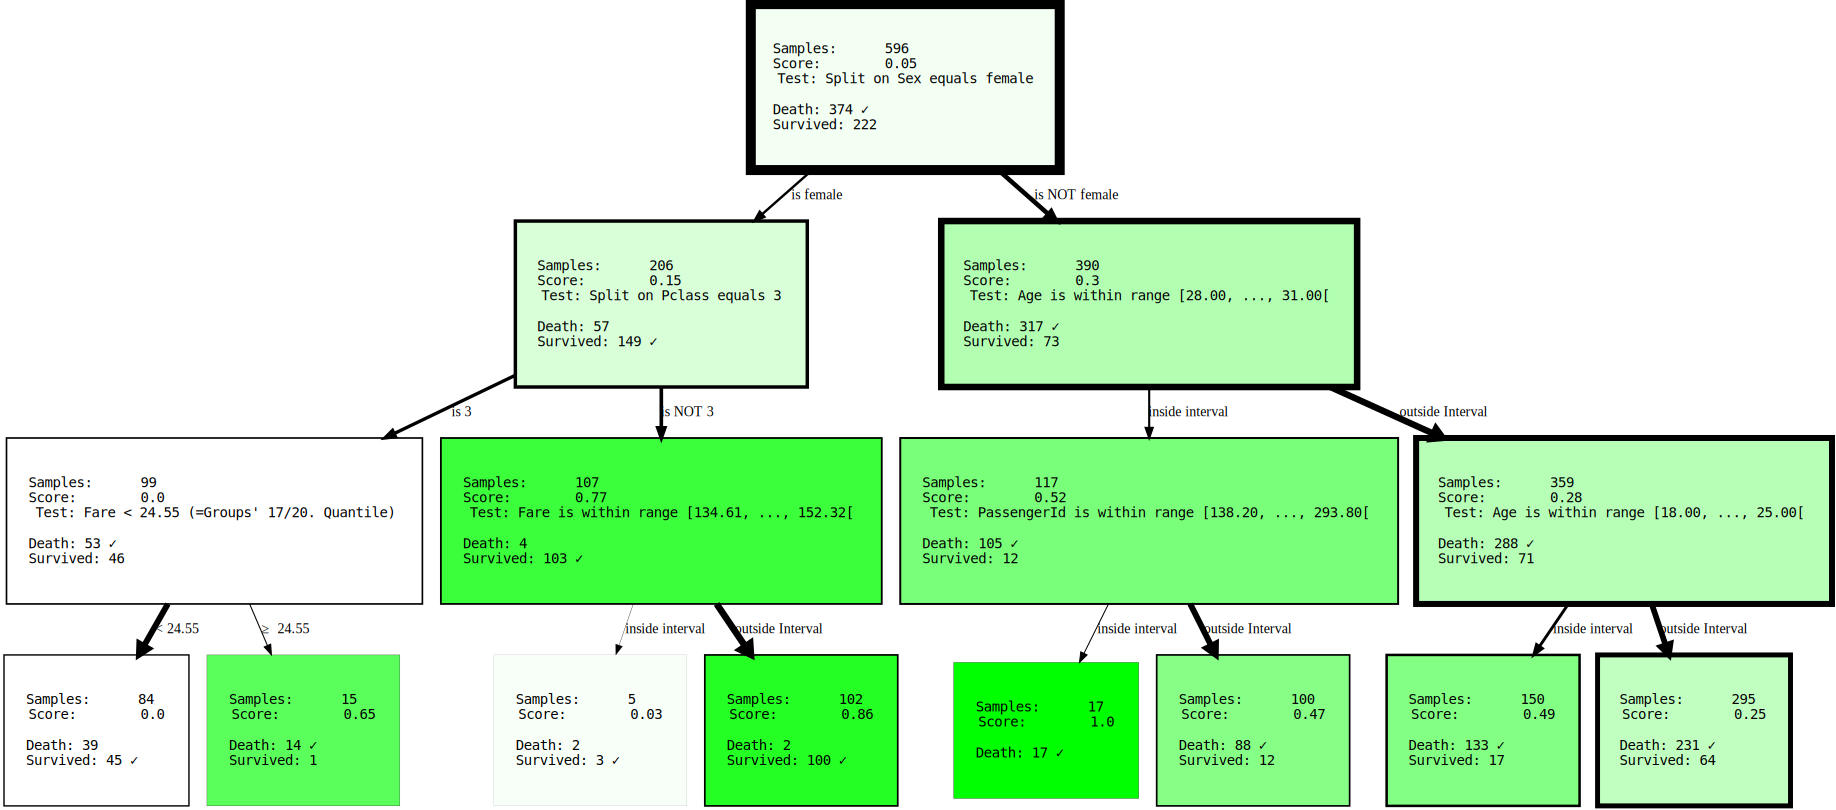

In [46]:
hdtree_titanic.generate_dot_graph()

Мы создали дерево решений, имеющее три уровня, которые выбрали для использования 3 из 4 возможных правил разделения *SplitRules*. Они помечены буквами *S1, S2, S3*. Что они делают:

* S1: `FixedValueSplit`. Это разделение работает с категориальными данными и выбирает одно из возможных значений. Затем данные разделяются на одну часть, имеющую это значение, и другую часть, для которой значение не установлено. Например, *PClass = 1* и *Pclass ≠ 1*.
* S2: `QuantileRangeSplit`. Они работают с числовыми данными. Правила **разделят** соответствующий диапазон значений оцениваемого атрибута **на фиксированное количество квантилей и интервалов**, находящихся в пределах ***последовательных подмножеств***. От квантиля 1 до квантиля 5 каждый включает одинаковое количество точек данных. Начальный квантиль и конечный квантиль (размер интервала) ищутся для оптимизации *измерения информации* (`measure_information`). Данные делятся на (i) имеющие значение в пределах этого интервала или (ii) — вне его. Доступны разделения различного количества квантилей.
* S3: `QuantileSplit`. Подобно разделению диапазона (S2), но разделяет данные по пороговому значению. Это в основном то, что делают обычные деревья решений, за исключением того, что они обычно пробуют все возможные пороги вместо их фиксированного числа.

Возможно, вы заметили, что `SingleCategorySplit` не задействован. Поясним, поскольку бездействие этого разделения всплывет позже:

* S4: `SingleCategorySplit` будет работать аналогично `FixedValueSplit`, но создаст дочерний узел для каждого возможного значения, например: для атрибута *PClass* это будет 3 дочерних узла (каждый для *Class 1, Class 2 и Class 3*). Обратите внимание, что `FixedValueSplit` идентичен `SingleValueSplit`, если есть только две возможные категории.

Может быть, вы решите, что самое первое разделение на вершине дерева слишком тривиально (разделение по атрибуту `sex`).

Самым простым решением было бы запретить `FixedValueSplit` (и, если уж на то пошло, эквивалентному `SingleCategorySplit`) появляться на вершине.

Измените инициализацию разбиений вот так:



In [47]:
hdtree_titanic_2 = HDTreeClassifier(allowed_splits=[FixedValueSplit.build_with_restrictions(min_level=1), SingleCategorySplit.build_with_restrictions(min_level=1), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()], information_measure=EntropyMeasure(), attribute_names=col_names, max_levels=3)
hdtree_titanic_2.fit(X_titanic_train.values, y_titanic_train.values)

Я представлю получившееся HDTree целиком, поскольку мы можем наблюдать недостающее разбиение (S4) внутри только что сгенерированного дерева.

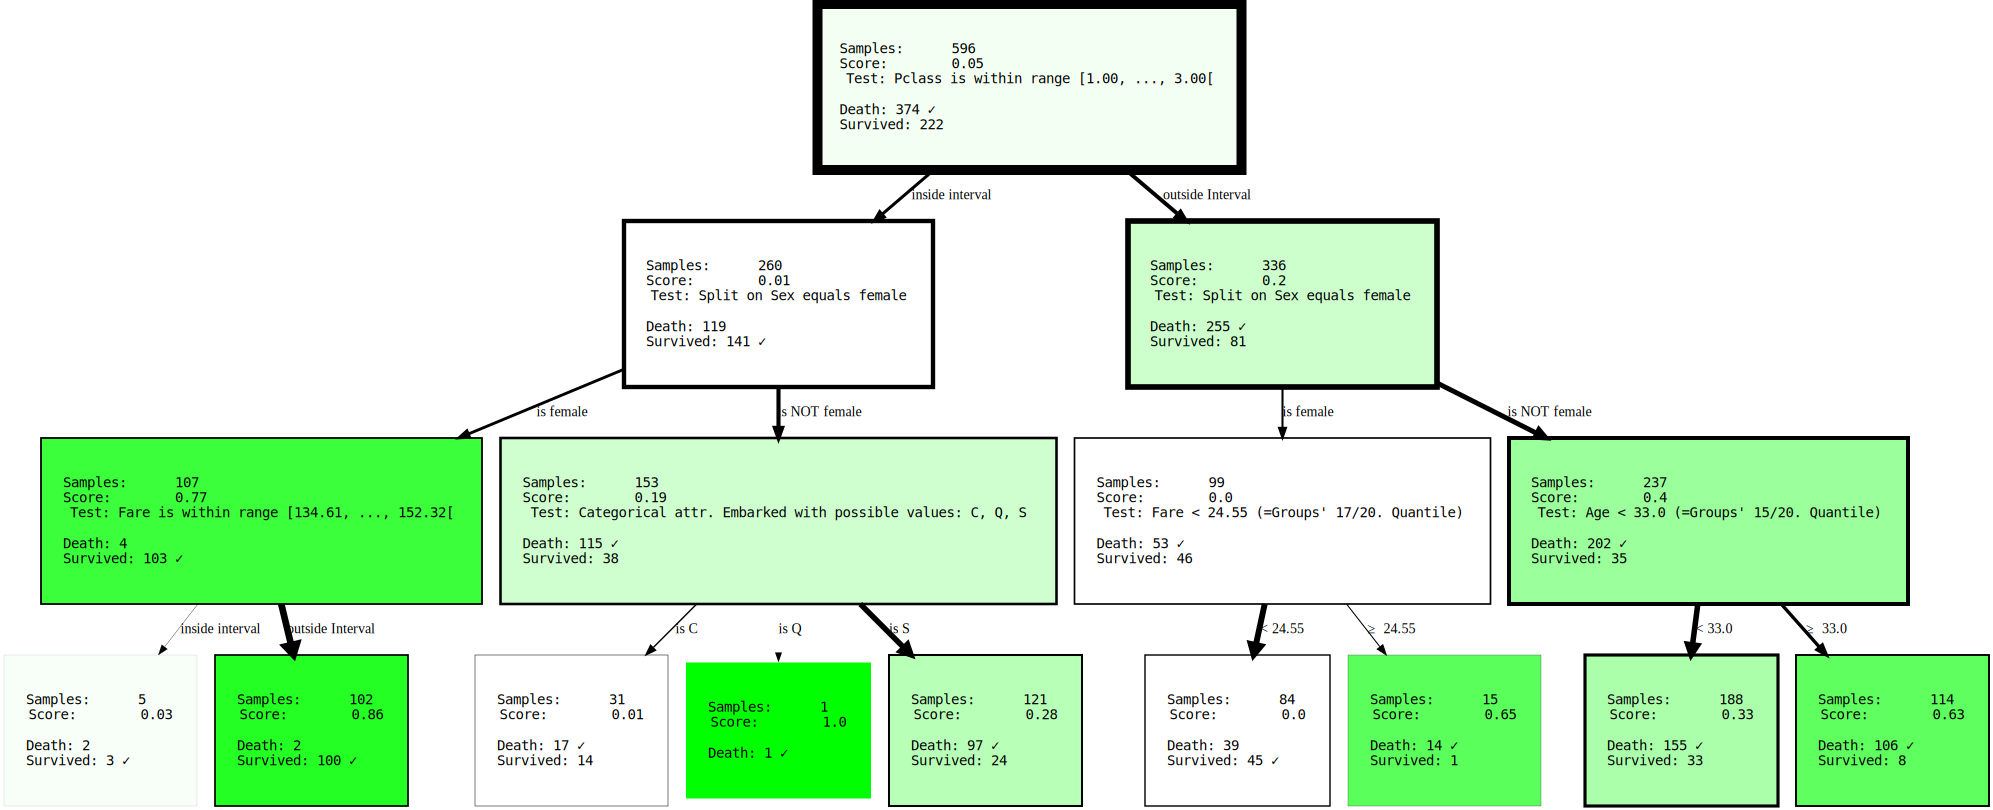

In [48]:
hdtree_titanic_2.generate_dot_graph()

Запрещая разделению по признаку sex появляться в корне благодаря параметру `min_level=1` (подсказка: конечно же, вы также можете предоставить `max_level`), мы полностью реструктурировали дерево.

Хотя это тривиально — заметить, что мужчины будут иметь только низкие шансы на выживание, в меньшей степени может иметь место вывод, что, будучи человеком в первом или втором классе `PClass` отплывающим из *Шербура* (`Embarked=C`), вы можете увеличить ваши шансы на выживание. Или что если вы мужчина из *PClass 3* и вам меньше 33 лет, ваши шансы тоже увеличиваются?

Ограничение разбиения конкретными атрибутами применимо не только для предотвращения обучения дерева на нежелательных корреляциях или **принудительных альтернативных решений**, но также сужает пространство поиска.

Если вы вернётесь к предыдущему примеру, то можете обнаружить узел, который проверяет наличие атрибута `PassengerId`. Возможно, мы не хотим его моделировать, поскольку он, по крайней мере, *не должен* вносить вклад в информацию о выживании.

Давайте изменим ситуацию с помощью параметра `blacklist_attribute_indices`.

In [49]:
hdtree_titanic_3 = HDTreeClassifier(allowed_splits=[FixedValueSplit.build_with_restrictions(blacklist_attribute_indices=['Name Length']), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build_with_restrictions(blacklist_attribute_indices=['PassengerId']), TwentyQuantileSplit.build()], information_measure=EntropyMeasure(), attribute_names=col_names, max_levels=3)
hdtree_titanic_3.fit(X_titanic_train.values, y_titanic_train.values)

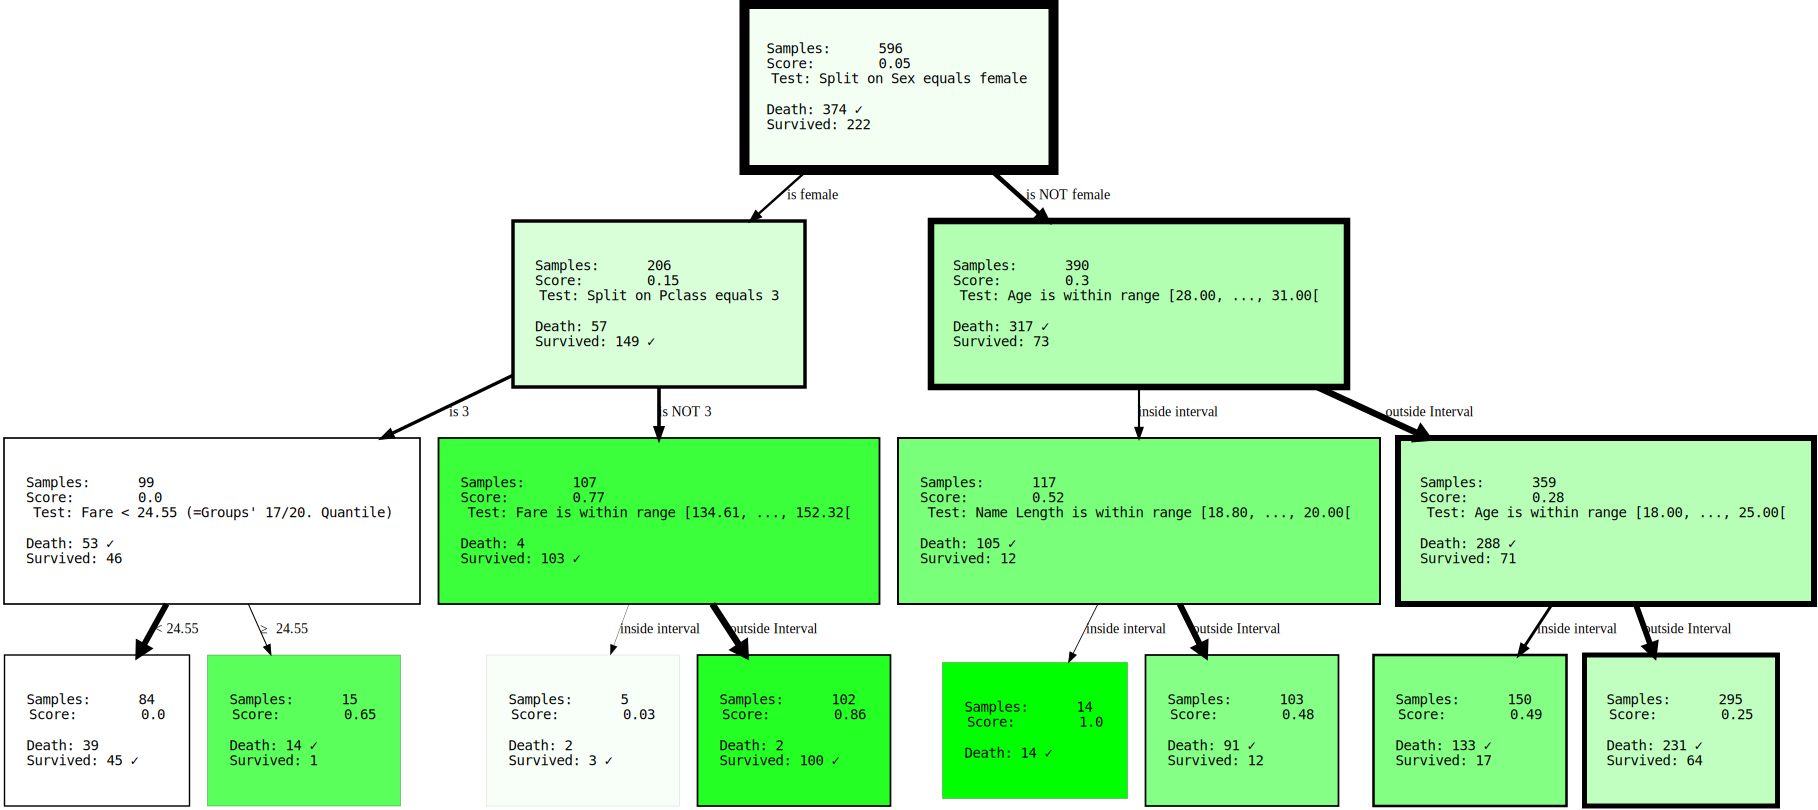

In [50]:
hdtree_titanic_3.generate_dot_graph()

Вы можете спросить, почему `name length` вообще появляется.

Дополнительная подсказка: вы всегда можете добавить то же `SplitRule` дважды. Если вы хотите внести в черный список атрибут только для определенных уровней HDTree, просто добавьте `SplitRule` без ограничения уровня.

Общий интерфейс scikit-learn, который можно использовать для прогнозирования, — это `predict()`, `predict_proba()`, а также `score()`. Но можно пойти дальше. Есть `explain_decision()`, которая выведет текстовое представление решения.

In [58]:
print(hdtree_titanic_3.explain_decision(X_titanic_train.iloc[42]))

Query: 
 {'PassengerId': 273, 'Pclass': 2, 'Sex': 'female', 'Age': 41.0, 'SibSp': 0, 'Parch': 1, 'Fare': 19.5, 'Cabin': nan, 'Embarked': 'S', 'Name Length': 41}

Predicted sample as "Survived" because of: 
Explanation 1:
Step 1: Sex matches value female
Step 2: Pclass is not 3
Step 3: Fare is OUTSIDE range [134.61, ..., 152.32[(19.50 is below range)
Step 4: Leaf. Vote for {'Survived'}
---------------------------------



/content/your_folder/hdtree/src/split_rule.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attribute_value = sample[attr_idx]
/content/your_folder/hdtree/src/split_rule.py:1573: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = sample[attr_idx]
/content/your_folder/hdtree/src/split_rule.py:1186: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attr_value = sample[attr_idx]
/content/your_folder/hdtree/src/split_rule.py:1608: Fu

Давайте установим индекс атрибута 2 (`Sex`) на отсутствующий (`None`):

In [61]:
passenger_42 = X_titanic_train.iloc[42].copy()
passenger_42[2] = None
print(hdtree_titanic_3.explain_decision(passenger_42))

Query: 
 {'PassengerId': 273, 'Pclass': 2, 'Sex': None, 'Age': 41.0, 'SibSp': 0, 'Parch': 1, 'Fare': 19.5, 'Cabin': nan, 'Embarked': 'S', 'Name Length': 41}

Predicted sample as "Survived" because of: 
Explanation 1:
Step 1: Sex is not female
Step 2: Pclass is not 3
Step 3: Fare is OUTSIDE range [134.61, ..., 152.32[(19.50 is below range)
Step 4: Leaf. Vote for {'Survived'}
---------------------------------
Explanation 2:
Step 1: Sex is not female
Step 2: Age is OUTSIDE range [28.00, ..., 31.00[(41.00 is above range)
Step 3: Age is OUTSIDE range [18.00, ..., 25.00[(41.00 is above range)
Step 4: Leaf. Vote for {'Death'}
---------------------------------



<ipython-input-61-568830c59782>:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  passenger_42[2] = None
/content/your_folder/hdtree/src/split_rule.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attribute_value = sample[attr_idx]
/content/your_folder/hdtree/src/split_rule.py:1573: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = sample[attr_idx]
/content/your_folder/hdtree/src/split_rule.py:1186: FutureWarning: Series

Вы можете продолжить и получить представление дерева в виде текста:

In [62]:
print(hdtree_titanic_3)

Level 0, ROOT: Node having 596 samples and 2 children with split rule "Split on Sex equals female" (Split Score: 0.251)
-Level 1, Child #1: Node having 206 samples and 2 children with split rule "Split on Pclass equals 3" (Split Score: 0.402)
--Level 2, Child #1: Node having 99 samples and 2 children with split rule "Fare < 24.55 (=Groups' 17/20. Quantile)" (Split Score: 0.101)
---Level 3, Child #1: Node having 84 samples and no children with split rule "no split rule" (Node Score: 0.004) (LEAF)
---Level 3, Child #2: Node having 15 samples and no children with split rule "no split rule" (Node Score: 0.647) (LEAF)
--Level 2, Child #2: Node having 107 samples and 2 children with split rule "Fare is within range [134.61, ..., 152.32[" (Split Score: 0.822)
---Level 3, Child #1: Node having 5 samples and no children with split rule "no split rule" (Node Score: 0.029) (LEAF)
---Level 3, Child #2: Node having 102 samples and no children with split rule "no split rule" (Node Score: 0.861) (LEA

Или получить доступ ко всем чистым узлам (с высоким баллом):

In [63]:
[str(node) for node in hdtree_titanic_3.get_clean_nodes(min_score=0.5)]

['Node having 15 samples and no children with split rule "no split rule" (Node Score: 0.647)',
 'Node having 107 samples and 2 children with split rule "Fare is within range [134.61, ..., 152.32[" (Split Score: 0.822)',
 'Node having 102 samples and no children with split rule "no split rule" (Node Score: 0.861)',
 'Node having 117 samples and 2 children with split rule "Name Length is within range [18.80, ..., 20.00[" (Split Score: 0.543)',
 'Node having 14 samples and no children with split rule "no split rule" (Node Score: 1.0)']

Самое значимое, что вы, возможно, захотите добавить в систему — это ваше собственное `SplitRule`.

Реализуйте `SplitRule` через реализацию `AbstractSplitRule`.